Lara R. Jakosalem

# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. 

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from ucimlrepo import fetch_ucirepo

# Fetch dataset
hepatitis = fetch_ucirepo(id=46)

# Check the structure of the fetched data
print(hepatitis.data)  # Print the structure of the data
print(hepatitis.data.features)  # Print the features data
print(hepatitis.data.targets)  # Print the targets data

{'ids': None, 'features':      Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
0     30    2      1.0           2      2.0      2.0       2.0        1.0   
1     50    1      1.0           2      1.0      2.0       2.0        1.0   
2     78    1      2.0           2      1.0      2.0       2.0        2.0   
3     31    1      NaN           1      2.0      2.0       2.0        2.0   
4     34    1      2.0           2      2.0      2.0       2.0        2.0   
..   ...  ...      ...         ...      ...      ...       ...        ...   
150   46    1      2.0           2      1.0      1.0       1.0        2.0   
151   44    1      2.0           2      1.0      2.0       2.0        2.0   
152   61    1      1.0           2      1.0      1.0       2.0        1.0   
153   53    2      1.0           2      1.0      2.0       2.0        2.0   
154   43    1      2.0           2      1.0      2.0       2.0        2.0   

     Liver Firm  Spleen Palpable  Spiders  Ascite

In [33]:
# Convert to DataFrame for easier handling
X = pd.DataFrame(hepatitis.data.features)

In [34]:
# Ensure targets are correctly formatted as a Series
if isinstance(hepatitis.data.targets, pd.DataFrame):
    y = hepatitis.data.targets.squeeze()  # Convert DataFrame to Series if needed
else:
    y = pd.Series(hepatitis.data.targets, name='target')

In [35]:
# Check the first few rows to understand the structure
print("Features Head:")
print(X.head())  # Check the first few rows of features
print("Targets Head:")
print(y.head())  # Check the first few rows of targets

Features Head:
   Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
0   30    2      1.0           2      2.0      2.0       2.0        1.0   
1   50    1      1.0           2      1.0      2.0       2.0        1.0   
2   78    1      2.0           2      1.0      2.0       2.0        2.0   
3   31    1      NaN           1      2.0      2.0       2.0        2.0   
4   34    1      2.0           2      2.0      2.0       2.0        2.0   

   Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
0         2.0              2.0      2.0      2.0      2.0        1.0   
1         2.0              2.0      2.0      2.0      2.0        0.9   
2         2.0              2.0      2.0      2.0      2.0        0.7   
3         2.0              2.0      2.0      2.0      2.0        0.7   
4         2.0              2.0      2.0      2.0      2.0        1.0   

   Alk Phosphate   Sgot  Albumin  Protime  Histology  
0           85.0   18.0      4.0      NaN     

In [36]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [37]:
# Concatenate features and target variables along columns axis
df = pd.concat([X_imputed, y], axis=1)

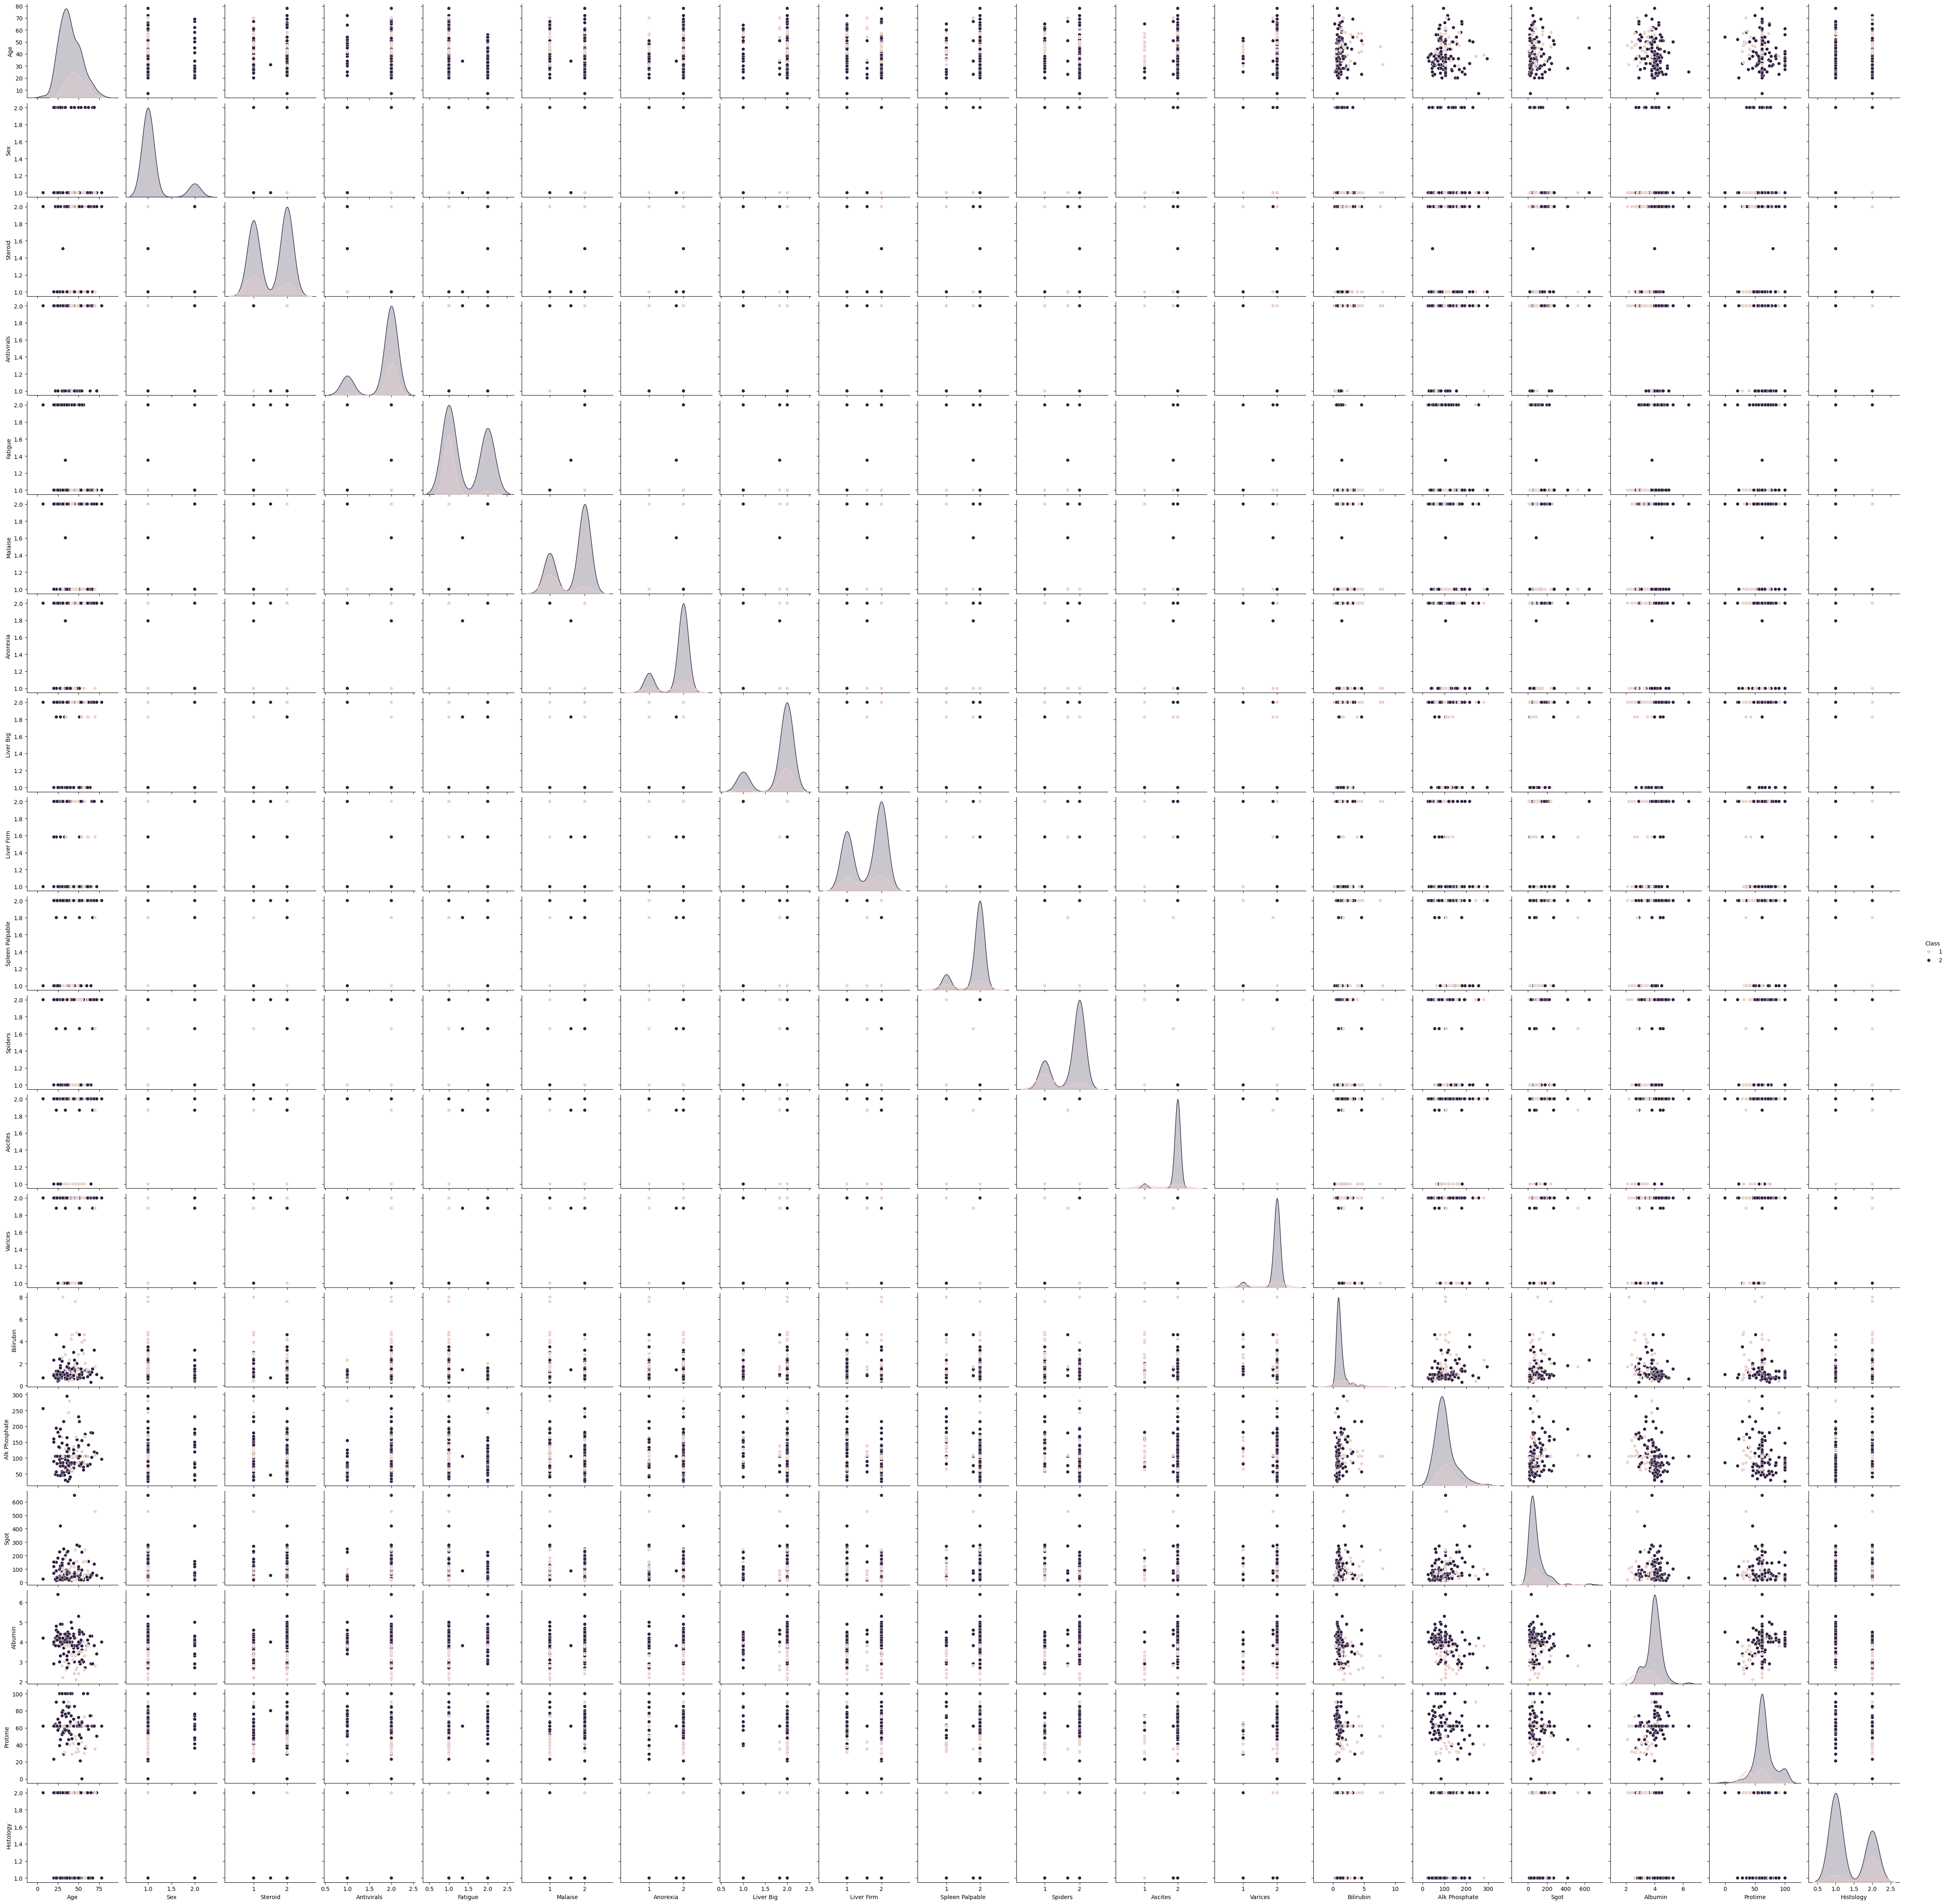

In [45]:
# EDA: Pairplot
sns.pairplot(df, hue='Class', diag_kind='kde')
plt.show()

In [46]:
# Display the first few rows of the DataFrame
print("DataFrame Head:")
print(df.head())

DataFrame Head:
    Age  Sex   Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
0  30.0  2.0  1.000000         2.0      2.0      2.0       2.0        1.0   
1  50.0  1.0  1.000000         2.0      1.0      2.0       2.0        1.0   
2  78.0  1.0  2.000000         2.0      1.0      2.0       2.0        2.0   
3  31.0  1.0  1.506494         1.0      2.0      2.0       2.0        2.0   
4  34.0  1.0  2.000000         2.0      2.0      2.0       2.0        2.0   

   Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
0         2.0              2.0      2.0      2.0      2.0        1.0   
1         2.0              2.0      2.0      2.0      2.0        0.9   
2         2.0              2.0      2.0      2.0      2.0        0.7   
3         2.0              2.0      2.0      2.0      2.0        0.7   
4         2.0              2.0      2.0      2.0      2.0        1.0   

   Alk Phosphate   Sgot  Albumin    Protime  Histology  Class  
0      85.000000   18.0 

In [47]:
# Explore the structure of the DataFrame
print("DataFrame Info:")
print(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    float64
 1   Sex              155 non-null    float64
 2   Steroid          155 non-null    float64
 3   Antivirals       155 non-null    float64
 4   Fatigue          155 non-null    float64
 5   Malaise          155 non-null    float64
 6   Anorexia         155 non-null    float64
 7   Liver Big        155 non-null    float64
 8   Liver Firm       155 non-null    float64
 9   Spleen Palpable  155 non-null    float64
 10  Spiders          155 non-null    float64
 11  Ascites          155 non-null    float64
 12  Varices          155 non-null    float64
 13  Bilirubin        155 non-null    float64
 14  Alk Phosphate    155 non-null    float64
 15  Sgot             155 non-null    float64
 16  Albumin          155 non-null    float64
 17  

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [49]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           1       0.12      0.14      0.13         7
           2       0.74      0.71      0.72        24

    accuracy                           0.58        31
   macro avg       0.43      0.43      0.43        31
weighted avg       0.60      0.58      0.59        31

